In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('project_job_market_analysis.csv')

# Display first few rows
df.head()


,ID,Job_Title,Salary_Estimate,FIELD4,Rating,Company_Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),NaN,3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973.0,...,0,0,1,1,0,0,0,Data scientist,Na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),NaN,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984.0,...,0,0,0,0,0,0,0,Data scientist,Na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),NaN,4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010.0,...,0,0,0,0,0,0,0,Data scientist,Na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),NaN,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965.0,...,0,0,0,0,0,0,0,Data scientist,Na,Na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),NaN,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998.0,...,0,0,0,0,0,0,0,Data scientist,Na,Na


In [3]:
# Basic info
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Quick statistics
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  742 non-null    int64  
 1   Job_Title           742 non-null    object 
 2   Salary_Estimate     742 non-null    object 
 3   FIELD4              0 non-null      float64
 4   Rating              731 non-null    float64
 5   Company_Name        742 non-null    object 
 6   Location            742 non-null    object 
 7   Headquarters        741 non-null    object 
 8   Size                742 non-null    object 
 9   Founded             692 non-null    float64
 10  Type_of_ownership   742 non-null    object 
 11  Industry            732 non-null    object 
 12  Sector              732 non-null    object 
 13  Revenue             742 non-null    object 
 14  Competitors         282 non-null    object 
 15  Hourly              742 non-null    int64  
 16  Employer

In [5]:
# Visualize Salary Distribution
plt.figure(figsize=(8,5))


<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

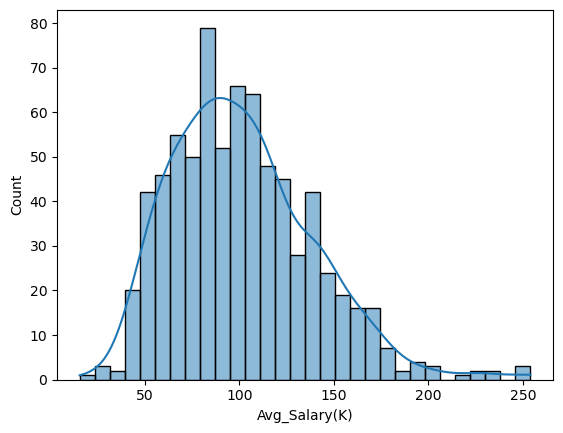

In [42]:
sns.histplot(df['Avg_Salary(K)'], bins=30, kde=True)
plt.savefig('Avg_Salary(K).png')


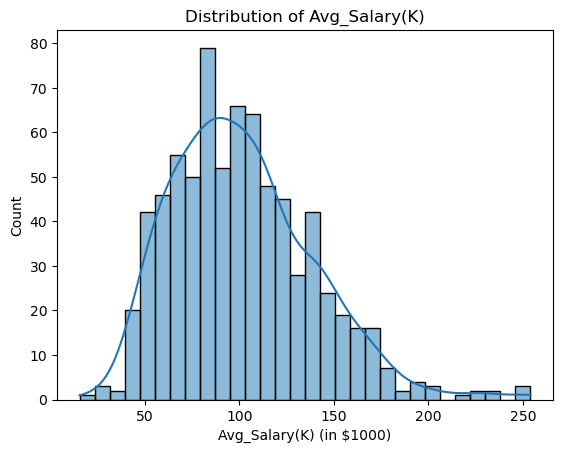

<Figure size 640x480 with 0 Axes>

In [41]:
sns.histplot(df['Avg_Salary(K)'], bins=30, kde=True)
plt.title('Distribution of Avg_Salary(K)')
plt.xlabel('Avg_Salary(K) (in $1000)')
plt.ylabel('Count')
plt.show()
plt.savefig('Distribution of Avg_Salary(K).png')

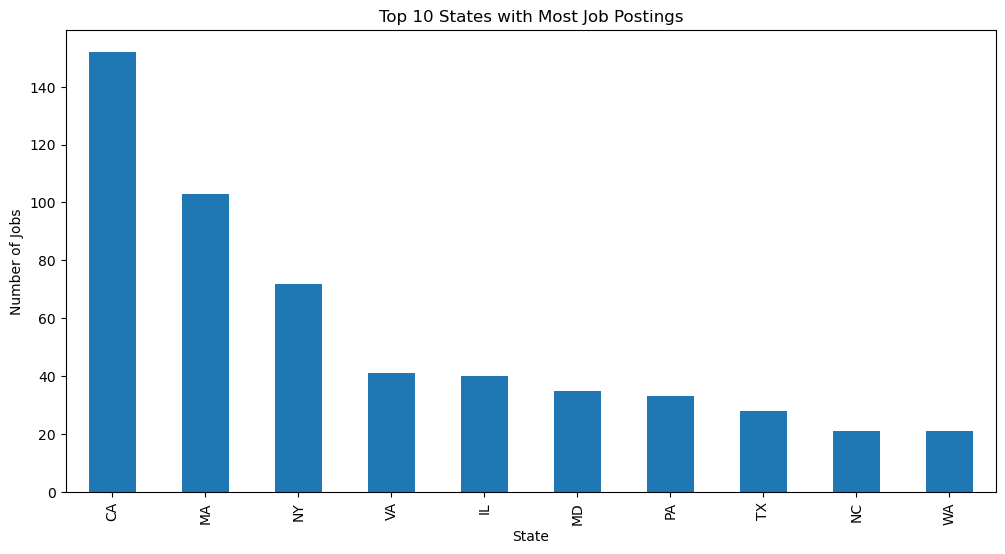

<Figure size 640x480 with 0 Axes>

In [40]:
# Extract State if not already separated
df['State'] = df['Location'].apply(lambda x: x.split(',')[-1].strip())

# Count jobs per State
state_counts = df['State'].value_counts()

# Plot
plt.figure(figsize=(12,6))
state_counts.head(10).plot(kind='bar')
plt.title('Top 10 States with Most Job Postings')
plt.xlabel('State')
plt.ylabel('Number of Jobs')
plt.show()
plt.savefig('Top 10 States with Most Job Postings.png')

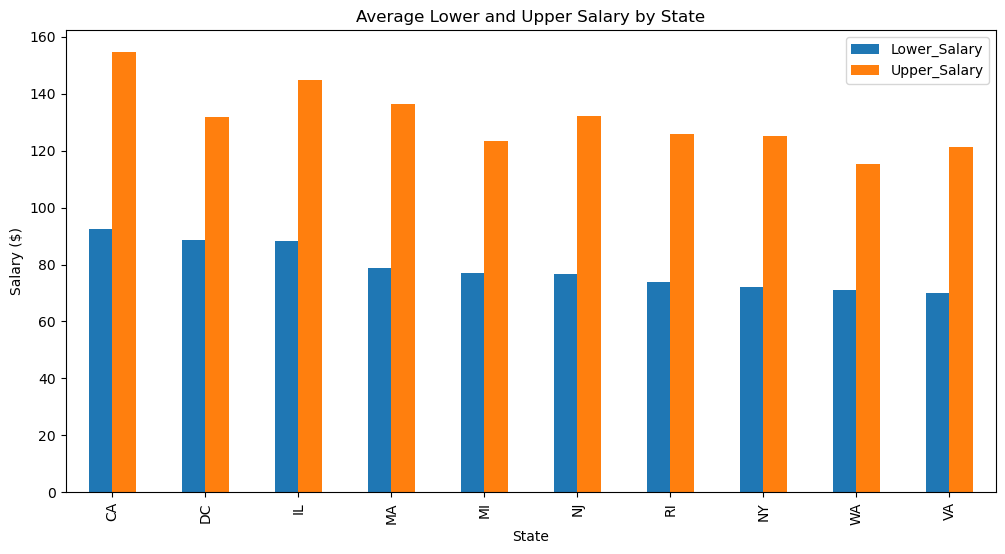

<Figure size 640x480 with 0 Axes>

In [39]:
# Group by State
salary_state = df.groupby('State')[['Lower_Salary', 'Upper_Salary']].mean().sort_values('Lower_Salary', ascending=False)

# Plot
salary_state[['Lower_Salary', 'Upper_Salary']].head(10).plot(kind='bar', figsize=(12,6))
plt.title('Average Lower and Upper Salary by State')
plt.ylabel('Salary ($)')
plt.show()
plt.savefig('Average Lower and Upper Salary by State.png')


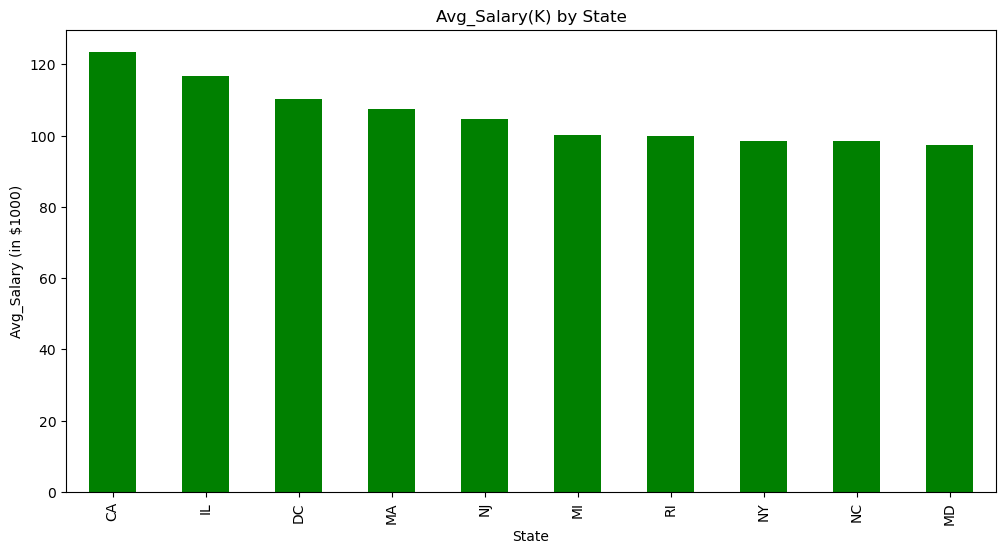

<Figure size 640x480 with 0 Axes>

In [38]:
avg_salary_state = df.groupby('State')['Avg_Salary(K)'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
avg_salary_state.head(10).plot(kind='bar', color='green')
plt.title('Avg_Salary(K) by State')
plt.xlabel('State')
plt.ylabel('Avg_Salary (in $1000)')
plt.show()
plt.savefig('Avg_Salary(K) by State.png')

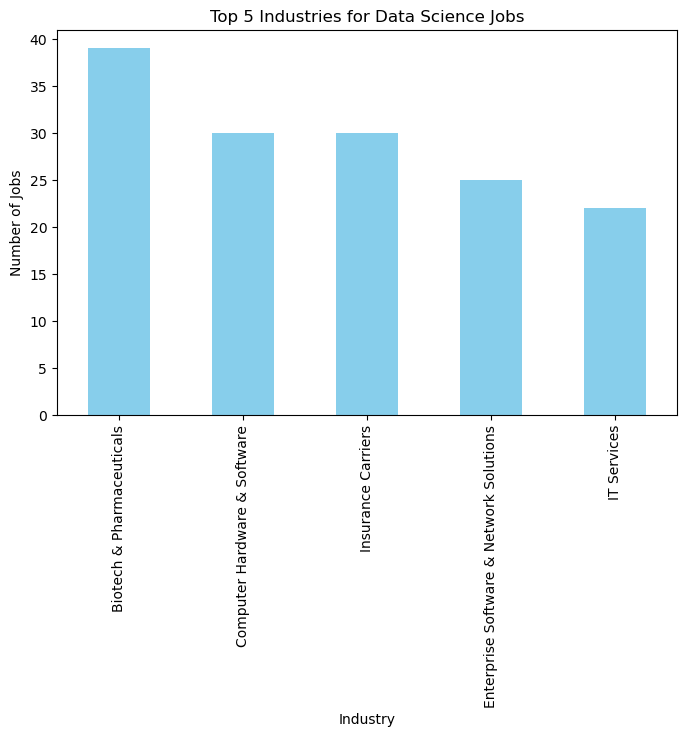

<Figure size 640x480 with 0 Axes>

In [37]:
# Filter data-science-related jobs
ds_jobs = df[df['job_title_sim'].str.contains('data scientist', case=False, na=False)]

# Count by industry
top_industries = ds_jobs['Industry'].value_counts().head(5)

# Plot
plt.figure(figsize=(8,5))
top_industries.plot(kind='bar', color='skyblue')
plt.title('Top 5 Industries for Data Science Jobs')
plt.ylabel('Number of Jobs')
plt.show()
plt.savefig('Top 5 Industries for Data Science Jobs.png')


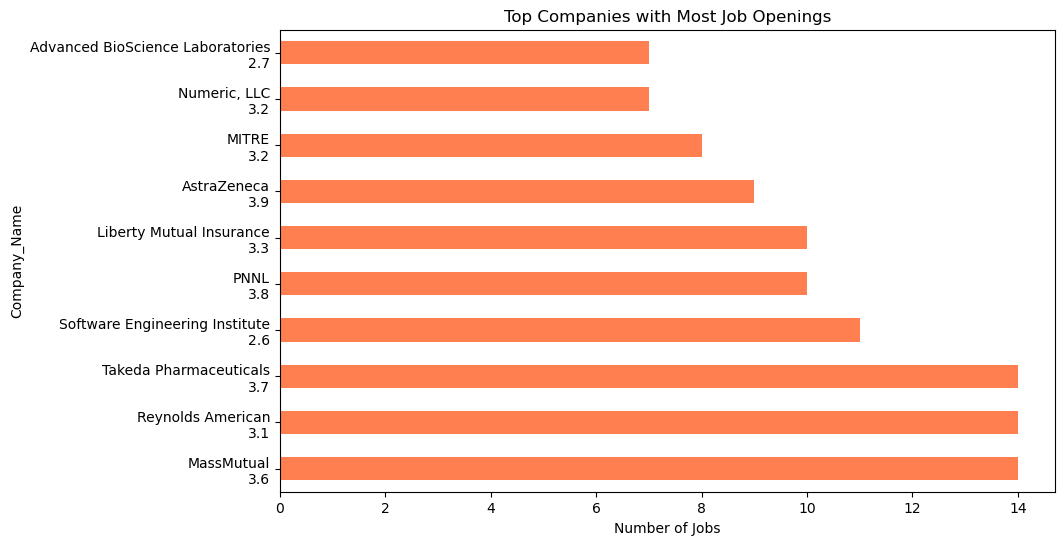

<Figure size 640x480 with 0 Axes>

In [36]:
top_companies = df['Company_Name'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_companies.plot(kind='barh', color='coral')
plt.title('Top Companies with Most Job Openings')
plt.xlabel('Number of Jobs')
plt.show()
plt.savefig('Top Companies with Most Job Openings.png')


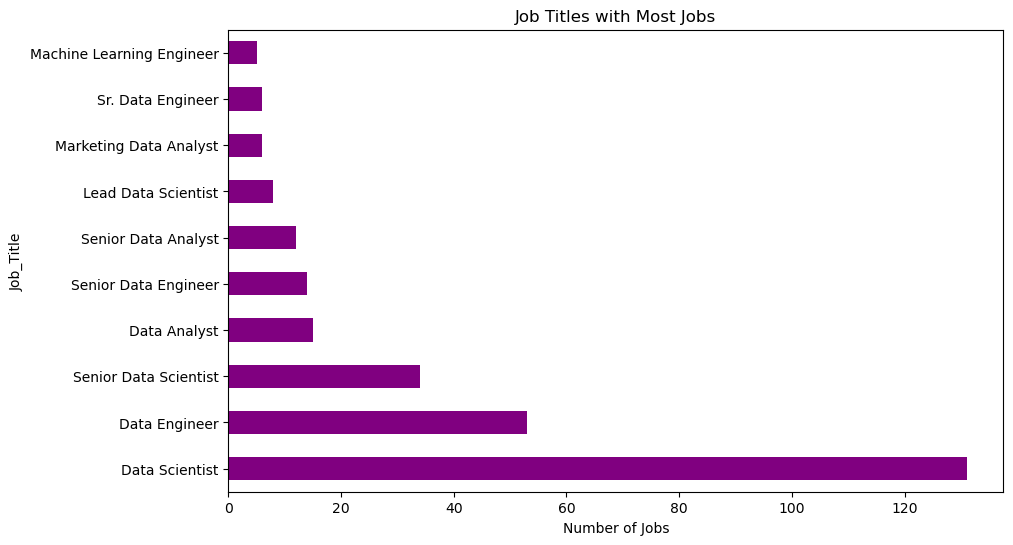

<Figure size 640x480 with 0 Axes>

In [35]:
top_titles = df['Job_Title'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_titles.plot(kind='barh', color='purple')
plt.title('Job Titles with Most Jobs')
plt.xlabel('Number of Jobs')
plt.show()
plt.savefig('Job Titles with Most Jobs.png')


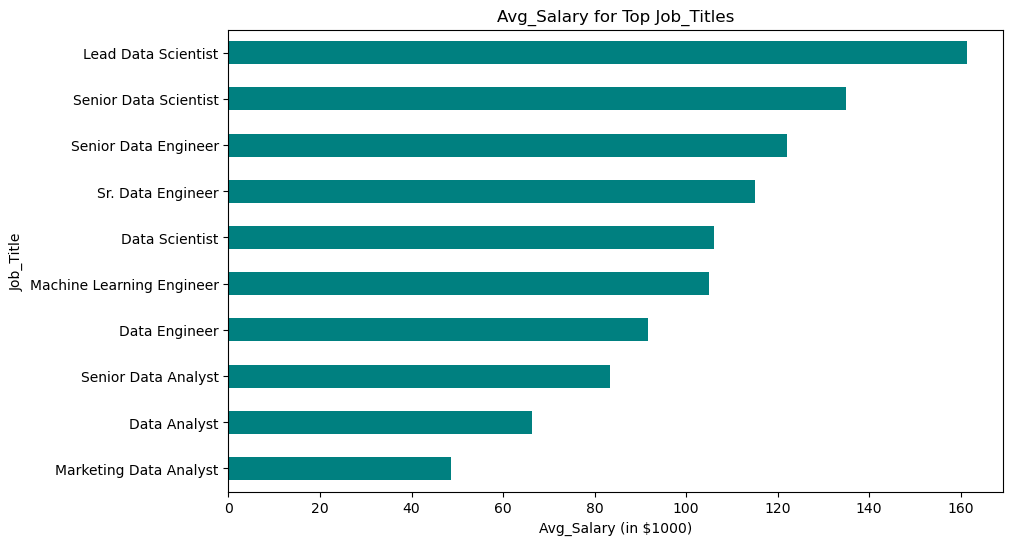

<Figure size 640x480 with 0 Axes>

In [34]:
# Find average salary for these titles
salary_titles = df[df['Job_Title'].isin(top_titles.index)].groupby('Job_Title')['Avg_Salary(K)'].mean()

plt.figure(figsize=(10,6))
salary_titles.sort_values().plot(kind='barh', color='teal')
plt.title('Avg_Salary for Top Job_Titles')
plt.xlabel('Avg_Salary (in $1000)')
plt.show()
plt.savefig('Avg_Salary for Top Job_Titles.png')



In [33]:
skill_cols = ['Python', 'spark', 'aws', 'excel']

# Group by Job Title
skill_requirements = df.groupby('Job_Title')[skill_cols].mean()

skill_requirements.head(10)
plt.savefig('Table.png')



<Figure size 640x480 with 0 Axes>

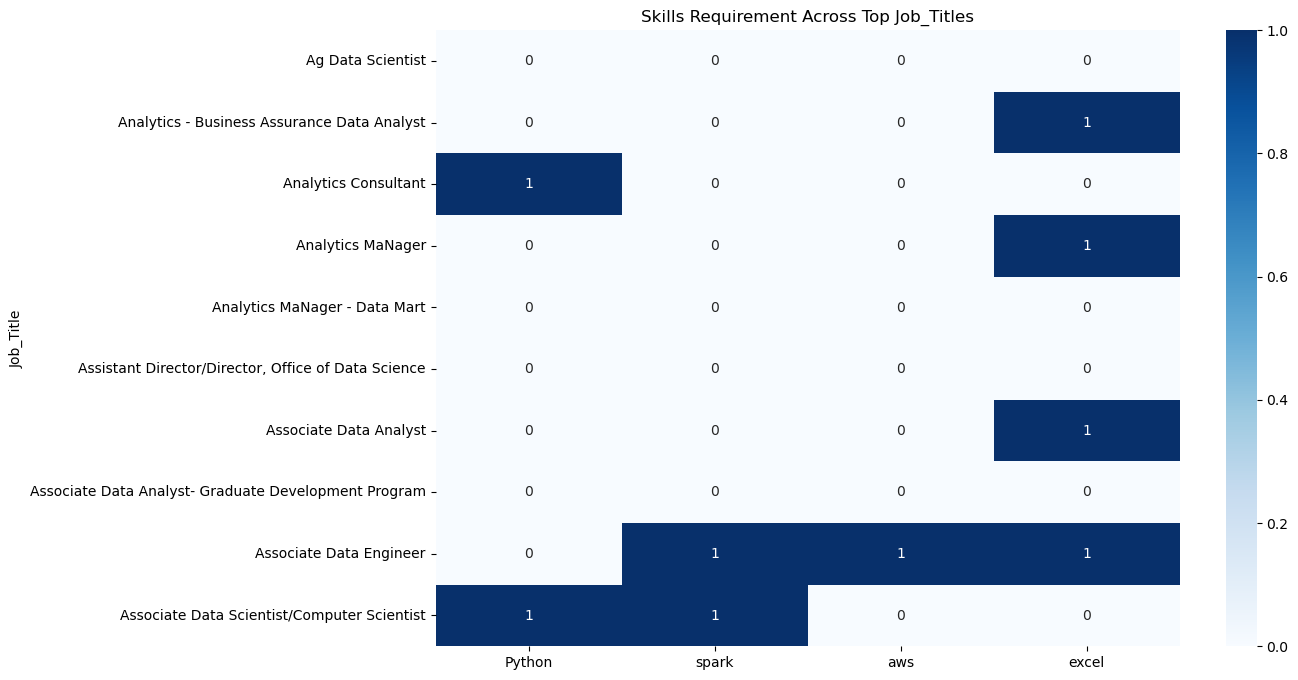

<Figure size 640x480 with 0 Axes>

In [32]:
plt.figure(figsize=(12,8))
sns.heatmap(skill_requirements.head(10), annot=True, cmap='Blues')
plt.title('Skills Requirement Across Top Job_Titles')
plt.show()
plt.savefig('Job_Titles.png')



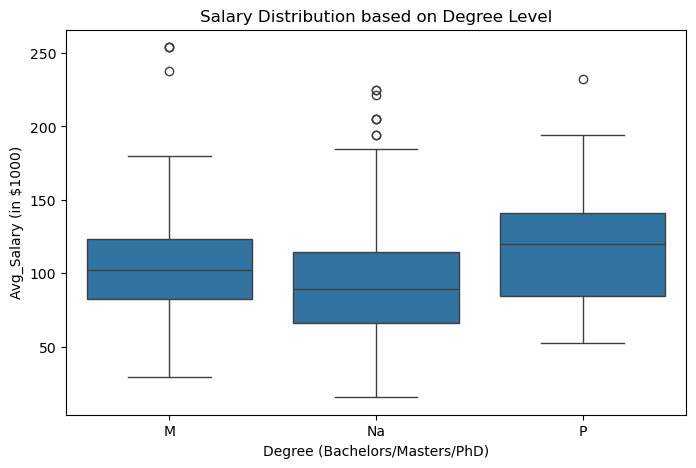

<Figure size 640x480 with 0 Axes>

In [31]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Degree', y='Avg_Salary(K)', data=df)
plt.title('Salary Distribution based on Degree Level')
plt.xlabel('Degree (Bachelors/Masters/PhD)')
plt.ylabel('Avg_Salary (in $1000)')
plt.show()
plt.savefig('chart_1_salary_distribution.png')



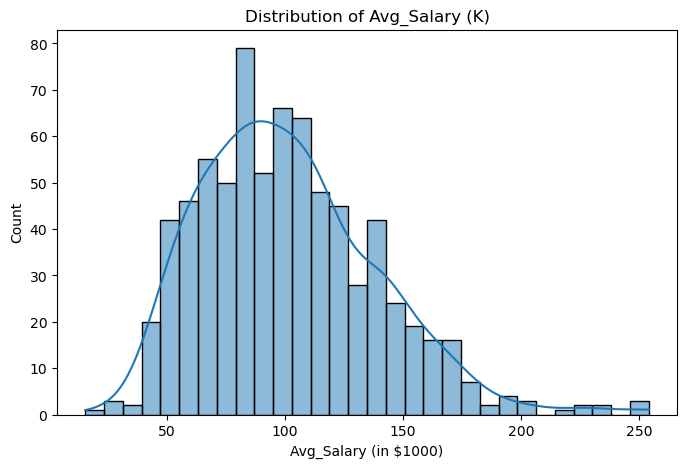

In [30]:
import matplotlib.pyplot as plt

# Your plot code
plt.figure(figsize=(8,5))
sns.histplot(df['Avg_Salary(K)'], bins=30, kde=True)
plt.title('Distribution of Avg_Salary (K)')
plt.xlabel('Avg_Salary (in $1000)')
plt.ylabel('Count')

# SAVE the figure
plt.savefig('Cleaned_project_job_market_plot.pdf')  # or .jpg, .pdf, etc.

# Show plot
plt.show()


# 📊 Job Market Analysis Project

## 👤 Name: Manish Karmankar  
**Team ID**: PTID-CDA-MAR-25-410  

---

## 📝 Project Objective

To analyze job market trends in the data science field using real-world job posting data.  
**Key goals include:**
- Identifying top states and cities with the most job openings.
- Comparing salary ranges across job titles and locations.
- Highlighting in-demand skills and required education.
- Understanding hiring trends by company and industry.
- Providing insights for job seekers and recruiters.

---

## 📁 Dataset Overview

- **Source**: Aggregated from various online job platforms  
- **Size**: 742 rows × 42 columns  
- **Key Features**:
  - `Job Title`, `Company`, `Salary Estimate`, `Location`
  - `Required Skills`: Python, SQL, Excel, AWS, etc.
  - `Education`: Bachelor, Master, Ph.D.
  - `Company Info`: Type, Rating, Size, Revenue

---

## 🛠 Tools & Methodology

- **Python (Pandas)**: Data cleaning and preprocessing  
- **Power BI**: Dashboard creation and visualization  

**Key Steps:**
1. Cleaned and standardized job data.
2. Replaced missing values and anomalies.
3. Performed feature engineering (e.g., salary extraction, skill flags).
4. Created visual dashboards to derive actionable insights.

---

## 📈 Key Insights

- **Top Hiring States**: California, Texas, New York
- **Highest Avg Salary**: Utah ($173K upper bound), Virginia, Washington
- **Top Job Titles**: Data Scientist, ML Engineer, Director
- **Salary by Title**:
  - Directors: $131K avg
  - ML Engineers: $126K avg
  - Data Scientists: $118K avg
- **Top Skills Required**: Python, SQL, Excel, AWS, Machine Learning
- **Education vs Salary**:
  - Ph.D.: $116K avg
  - Master's: $106K avg
  - Bachelor/Unknown: ~$95K avg

---

## 📌 Recommendations

### 🔷 For Job Seekers:
- Focus on high-demand skills like Python, AWS, SQL, ML
- Target job-rich states (CA, TX, NY)
- Consider further education (Master’s or Ph.D.) for salary growth

### 🔶 For Employers:
- Benchmark salaries against competitors
- Update job descriptions with in-demand skills
- Offer remote/hybrid work to attract top talent

---

## 📊 Tools Used

- **Power BI** – for building interactive visuals
- **Python (Jupyter Notebook)** – for preprocessing, EDA, and insight generation

---

## 💡 Future Enhancements

- Add time-series trend analysis
- Use LinkedIn API for live job market data
- Apply predictive models to forecast hiring demand
- Build a job recommendation engine based on skill match

---

## 🙌 Author

**Manish Karmankar**  
Certified Data Analyst Intern (DataMites)  
Location: Pune, Maharashtra (Originally from Chandrapur)

---

> 🔗 Project Files:
> - `Job market Analysis work.pbix` – Power BI dashboard  
> - `Job Market Analysis New PPT.pptx` – Summary presentation  
> - `Job market Ana;ysis.ipynb` – Python notebook

---

